In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
# !pip install missingno
import missingno as msno
from datetime import date
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler, RobustScaler

(307511, 122)
(418, 12)


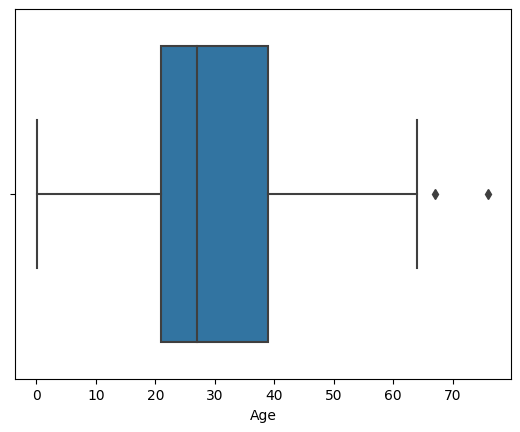

In [2]:
def load_application_train():
    data = pd.read_csv("application_train.csv")
    return data




#Shape of bigger dataset
df = load_application_train()
print(df.shape)        # (307511, 122)





def load():
    data = pd.read_csv("tested.csv")
    return data



#Shape of smaller dataset
df = load()
print(df.shape)       # (891, 12)


#We will try to detect outliers in a numerical 'Age' column by using 
#boxplot in 'titanic.csv'

sns.boxplot(x=df["Age"])
plt.show()  

In [3]:

q1 = df["Age"].quantile(0.25)
q3 = df["Age"].quantile(0.75)
iqr = q3 - q1
up = q3 + 1.5 * iqr
low = q1 - 1.5 * iqr




#Outliers
#print(df[(df["Age"] < low) | (df["Age"] > up)])
#index of outliers
#print(df[(df["Age"] < low) | (df["Age"] > up)].index)
#check for outliers  
print(df[(df["Age"] < low) | (df["Age"] > up)].any(axis=None))

True


In [4]:
def outlier_thresholds(dataframe, col_name, q1=0.25, q3=0.75):
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit




print(outlier_thresholds(df, "Age")) # (-6.0, 66.0)
#As you can see, if age is below -6.0 or higher 66.0, we can say that
#it is an outlier. But be careful, age cannot be lower than 0. So we don't
#need to care lower threshold since it is -6.0







(-6.0, 66.0)


In [5]:
low, up = outlier_thresholds(df, "Fare")
print(df[(df["Fare"] < low) | (df["Fare"] > up)].head())

    PassengerId  Survived  Pclass  \
12          904         1       1   
24          916         1       1   
48          940         1       1   
53          945         1       1   
59          951         1       1   

                                               Name     Sex   Age  SibSp  \
12    Snyder, Mrs. John Pillsbury (Nelle Stevenson)  female  23.0      1   
24  Ryerson, Mrs. Arthur Larned (Emily Maria Borie)  female  48.0      1   
48  Bucknell, Mrs. William Robert (Emma Eliza Ward)  female  60.0      0   
53                       Fortune, Miss. Ethel Flora  female  28.0      3   
59                      Chaudanson, Miss. Victorine  female  36.0      0   

    Parch    Ticket      Fare            Cabin Embarked  
12      0     21228   82.2667              B45        S  
24      3  PC 17608  262.3750  B57 B59 B63 B66        C  
48      0     11813   76.2917              D15        C  
53      2     19950  263.0000      C23 C25 C27        S  
59      0  PC 17608  262.3750 

In [6]:
#Write a function that check if there is any outliers.
def check_outlier(dataframe, col_name):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):
        return True
    else:
        return False

print(check_outlier(df, "Age"))    # True  (yes, there is at least 1 outlier.)
print(check_outlier(df, "Fare"))   # True  (yes, there is at least 1 outlier.)

True
True


In [7]:
#We will try to grab categorical columns, categorical but cardinal columns and
#numerical columns. 

def grab_col_names(dataframe, cat_th=10, car_th=20):
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]
    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and dataframe[col].dtypes != "O"]
    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and dataframe[col].dtypes == "O"]
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O" and col not in num_but_cat]

    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f"cat_cols: {len(cat_cols)}")
    print(f"num_cols: {len(num_cols)}")
    print(f"cat_but_car: {len(cat_but_car)}")
    print(f"num_but_cat: {len(num_but_cat)}")

    return cat_cols, num_cols, cat_but_car




cat_cols, num_cols, cat_but_car = grab_col_names(df)




num_cols = [col for col in num_cols if col not in "PassengerId"]
print(num_cols)  #  ['Age', 'Fare']



#We will check outliers in numerical columns.
for col in num_cols:
    print(col, check_outlier(df, col))





Observations: 418
Variables: 12
cat_cols: 6
num_cols: 3
cat_but_car: 3
num_but_cat: 4
['Age', 'Fare']
Age True
Fare True


In [8]:
#Let's import application_train.csv
dff = load_application_train()

cat_cols, num_cols, cat_but_car = grab_col_names(dff)


#Although 'SK_ID_CURR' is a numerical column, it is irrelevant for us. Therefore,
#we will remove it from num_cols
num_cols.remove('SK_ID_CURR')

print()
print()

#Let's see which numerical columns have outliers.
for col in num_cols:
    print(col, check_outlier(dff, col))


Observations: 307511
Variables: 122
cat_cols: 54
num_cols: 67
cat_but_car: 1
num_but_cat: 39


CNT_CHILDREN True
AMT_INCOME_TOTAL True
AMT_CREDIT True
AMT_ANNUITY True
AMT_GOODS_PRICE True
REGION_POPULATION_RELATIVE True
DAYS_BIRTH False
DAYS_EMPLOYED True
DAYS_REGISTRATION True
DAYS_ID_PUBLISH False
OWN_CAR_AGE True
CNT_FAM_MEMBERS True
HOUR_APPR_PROCESS_START True
EXT_SOURCE_1 False
EXT_SOURCE_2 False
EXT_SOURCE_3 False
APARTMENTS_AVG True
BASEMENTAREA_AVG True
YEARS_BEGINEXPLUATATION_AVG True
YEARS_BUILD_AVG True
COMMONAREA_AVG True
ELEVATORS_AVG True
ENTRANCES_AVG True
FLOORSMAX_AVG True
FLOORSMIN_AVG True
LANDAREA_AVG True
LIVINGAPARTMENTS_AVG True
LIVINGAREA_AVG True
NONLIVINGAPARTMENTS_AVG True
NONLIVINGAREA_AVG True
APARTMENTS_MODE True
BASEMENTAREA_MODE True
YEARS_BEGINEXPLUATATION_MODE True
YEARS_BUILD_MODE True
COMMONAREA_MODE True
ELEVATORS_MODE True
ENTRANCES_MODE True
FLOORSMAX_MODE True
FLOORSMIN_MODE True
LANDAREA_MODE True
LIVINGAPARTMENTS_MODE True
LIVINGAREA_MODE Tru

In [9]:
#The function below will show us the outlier values for the associated column.
#If there are outliers more than 10, it will only show us first 5 (f = 5) outliers.
#Otherwise, it will show all outliers. 

def grab_outliers(dataframe, col_name, outlier_index=False, f = 5):
    low, up = outlier_thresholds(dataframe, col_name)

    if dataframe[((dataframe[col_name] < low) | (dataframe[col_name] > up))].shape[0] > 10:
        print(dataframe[((dataframe[col_name] < low) | (dataframe[col_name] > up))].head(f))
    else:
        print(dataframe[((dataframe[col_name] < low) | (dataframe[col_name] > up))])

    if outlier_index:
        out_index = dataframe[((dataframe[col_name] < low) | (dataframe[col_name] > up))].index
        return out_index





age_index = grab_outliers(df, "Age", True)

    PassengerId  Survived  Pclass  \
81          973         0       1   
96          988         1       1   

                                                 Name     Sex   Age  SibSp  \
81                                 Straus, Mr. Isidor    male  67.0      1   
96  Cavendish, Mrs. Tyrell William (Julia Florence...  female  76.0      1   

    Parch    Ticket      Fare    Cabin Embarked  
81      0  PC 17483  221.7792  C55 C57        S  
96      0     19877   78.8500      C46        S  


In [10]:
#Let's import titanic data.
df = load()

#Remove Outliers..

low, up = outlier_thresholds(df, "Fare")
#Shape of data with outliers
print(df.shape) 




(418, 12)


In [11]:
#Be careful! We used tilda (~) in order to see the shape of data without outliers!
print(df[~((df["Fare"] < low) | (df["Fare"] > up))].shape)

(363, 12)


In [12]:
#We can write a function for this!!!
def remove_outlier(dataframe, col_name):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    df_without_outliers = dataframe[~((dataframe[col_name] < low_limit) | (dataframe[col_name] > up_limit))]
    return df_without_outliers




cat_cols, num_cols, cat_but_car = grab_col_names(df)

Observations: 418
Variables: 12
cat_cols: 6
num_cols: 3
cat_but_car: 3
num_but_cat: 4


In [13]:
num_cols.remove('PassengerId')

for col in num_cols:
    df = remove_outlier(df,col)




#Now we removed 'Age' outliers and 'Fare' outliers.
print(df.shape) 

(363, 12)


In [14]:
#Re-assignment with thresholds..
#Now we will assign outliers with thresholds. We can write a function for this
def replace_with_thresholds(dataframe, variable):
    low_limit, up_limit = outlier_thresholds(dataframe, variable)
    dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit


In [15]:
#Import titanic data.
df = load()
cat_cols, num_cols, cat_but_car = grab_col_names(df)

Observations: 418
Variables: 12
cat_cols: 6
num_cols: 3
cat_but_car: 3
num_but_cat: 4


In [16]:
num_cols.remove('PassengerId')
#Let's see which column has outliers...
for col in num_cols:
    print(col, check_outlier(df, col))


Age True
Fare True


In [17]:

#Now replace these outliers with thresholds.
for col in num_cols:
    replace_with_thresholds(df, col)



#After replacing, we shouldn't have any outlier. So let's check again.
for col in num_cols:
    print(col, check_outlier(df, col))

Age False
Fare False
